# **Project Name:** Petrol Price Forecasting  using Tensor Flow

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.
### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

**Importing Libraries & Dataset**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
petrolprice_df = pd.read_csv("/Users/bilaldilbar/Documents/GeorgeBrown/Projects/Petrol Price Forecasting/Dataset/train_data.csv")
petrolprice_df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [3]:
petrolprice_df.rename(columns={"Petrol (USD)": "Petrol"}, inplace=True)
petrolprice_df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis**

In [5]:
petrolprice_df.shape

(813, 2)

In [10]:
petrolprice_df.info

<bound method DataFrame.info of            Date  Petrol
0      6/9/2003   74.59
1     6/16/2003   74.47
2     6/23/2003   74.42
3     6/30/2003   74.35
4      7/7/2003   74.28
..          ...     ...
808   12/3/2018  124.30
809  12/10/2018  122.37
810  12/17/2018  121.02
811  12/24/2018  120.61
812  12/31/2018  120.18

[813 rows x 2 columns]>

In [6]:
petrolprice_df.describe()

,Petrol
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [7]:
petrolprice_df.dtypes

Date       object
Petrol    float64
dtype: object

In [8]:
petrolprice_df.isnull().sum()

Date      0
Petrol    2
dtype: int64

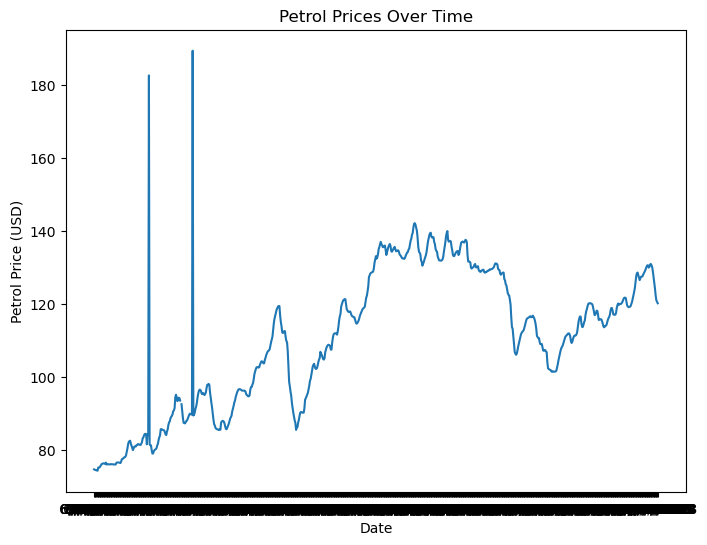

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(petrolprice_df['Date'], petrolprice_df['Petrol'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

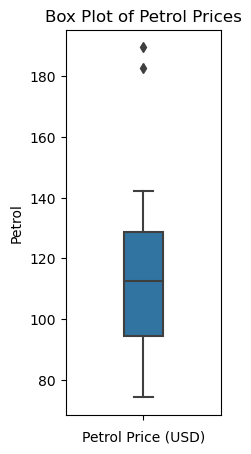

In [13]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=petrolprice_df['Petrol'],  width=0.25)
plt.title('Box Plot of Petrol Prices')
plt.xlabel('Petrol Price (USD)')
plt.show()

**Data Imputation**

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [16]:
imputer = IterativeImputer(max_iter=10, random_state=0)
petrolprice_df['Petrol'] = imputer.fit_transform(petrolprice_df[['Petrol']])
petrolprice_df.isna().sum()

Date      0
Petrol    0
dtype: int64

**Removing Outliers**

In [17]:
from sklearn.ensemble import IsolationForest

In [18]:
model = IsolationForest(contamination=0.05)
petrolprice_df['Outlier'] = model.fit_predict(petrolprice_df[['Petrol']])
petrolprice_df = petrolprice_df[petrolprice_df['Outlier'] != -1]

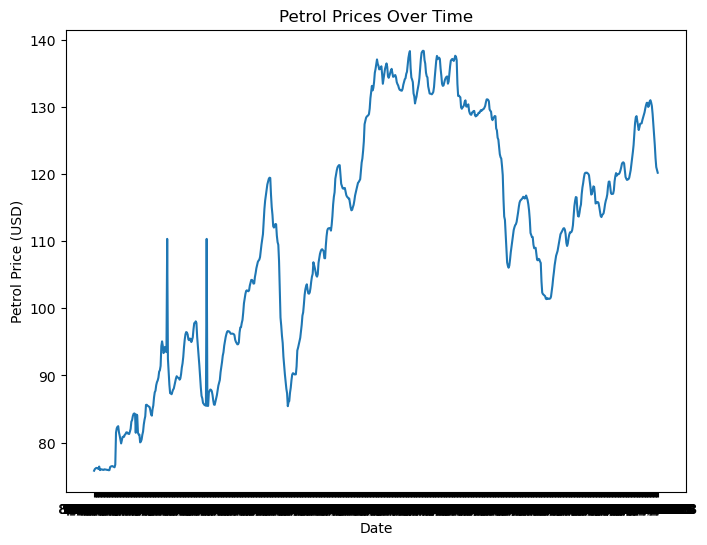

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(petrolprice_df['Date'], petrolprice_df['Petrol'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

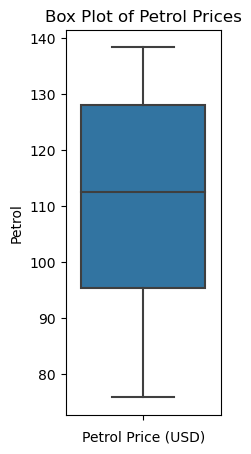

In [20]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=petrolprice_df['Petrol'])
plt.title('Box Plot of Petrol Prices')
plt.xlabel('Petrol Price (USD)')
plt.show()

In [22]:
petrolprice_df=petrolprice_df.reset_index()['Petrol']
petrolprice_df.head()

0    75.81
1    76.05
2    76.13
3    76.23
4    76.20
Name: Petrol, dtype: float64

**Data Scaling**

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
petrolprice_df = scaler.fit_transform(np.array(petrolprice_df).reshape(-1,1))

In [24]:
petrolprice_df

array([[0.        ],
       [0.00383754],
       [0.00511673],
       [0.0067157 ],
       [0.00623601],
       [0.00543652],
       [0.00431724],
       [0.00991366],
       [0.00143908],
       [0.00383754],
       [0.00303806],
       [0.00303806],
       [0.00207867],
       [0.00191877],
       [0.00335785],
       [0.00303806],
       [0.00255836],
       [0.00239846],
       [0.00175887],
       [0.00207867],
       [0.00111928],
       [0.00143908],
       [0.00879437],
       [0.01007355],
       [0.01071314],
       [0.01103294],
       [0.01007355],
       [0.00911417],
       [0.00815478],
       [0.01471059],
       [0.09082187],
       [0.10105532],
       [0.10457307],
       [0.10601215],
       [0.09162136],
       [0.08362648],
       [0.07355293],
       [0.06491845],
       [0.07243364],
       [0.08042853],
       [0.08090822],
       [0.08074832],
       [0.08586505],
       [0.08698433],
       [0.09114167],
       [0.09146146],
       [0.0889031 ],
       [0.087

**Splitting The Data**

In [25]:
training_size = int(len(petrolprice_df) * 0.65)
test_size = len(petrolprice_df) - training_size
train_data, test_data = petrolprice_df[0:training_size,:], petrolprice_df[training_size:len(petrolprice_df), :1]

In [26]:
train_data.shape

(501, 1)

In [27]:
test_data.shape

(271, 1)

**Data Pre-Processing**

In [28]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [29]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
X_train

array([[0.        , 0.00383754, 0.00511673, ..., 0.2948513 , 0.29309242,
        0.28237928],
       [0.00383754, 0.00511673, 0.0067157 , ..., 0.29309242, 0.28237928,
        0.55197443],
       [0.00511673, 0.0067157 , 0.00623601, ..., 0.28237928, 0.55197443,
        0.26638951],
       ...,
       [0.94595459, 0.95698753, 0.96354333, ..., 0.98800768, 0.98592901,
        0.97761433],
       [0.95698753, 0.96354333, 0.96977934, ..., 0.98592901, 0.97761433,
        0.92085066],
       [0.96354333, 0.96977934, 0.96162456, ..., 0.97761433, 0.92085066,
        0.89238887]])

In [31]:
y_train

array([0.55197443, 0.26638951, 0.23536936, 0.20466901, 0.18452191,
       0.18452191, 0.18212344, 0.18787976, 0.19299648, 0.19539495,
       0.20386952, 0.21106492, 0.21969939, 0.22497602, 0.22257755,
       0.22129837, 0.22049888, 0.21682123, 0.21969939, 0.22993284,
       0.24544292, 0.25535657, 0.27118644, 0.2945315 , 0.31244004,
       0.32491206, 0.33018868, 0.3290694 , 0.32443236, 0.31259994,
       0.31068116, 0.31467861, 0.31387912, 0.30636393, 0.31116086,
       0.31787656, 0.33690438, 0.35129517, 0.35209466, 0.35561241,
       0.35193476, 0.31867605, 0.29724976, 0.27294531, 0.25055964,
       0.22337704, 0.19811321, 0.178126  , 0.17252958, 0.16149664,
       0.15877838, 0.15653981, 0.15558043, 0.15478094, 0.55197443,
       0.15446114, 0.15430125, 0.18596098, 0.19011832, 0.19331628,
       0.19251679, 0.18947873, 0.18052446, 0.16741286, 0.1574992 ,
       0.15685961, 0.16485449, 0.17252958, 0.18004477, 0.19075791,
       0.20259034, 0.20978574, 0.21602175, 0.23440998, 0.24576

In [32]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
X_train.shape

(400, 100, 1)

In [34]:
X_test.shape

(170, 100, 1)

**LSTM Model Building**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,validation_data = (X_test,ytest), epochs = 200, batch_size=128, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 139ms/step - loss: 0.0018 - val_loss: 8.1207e-04
Epoch 2/200
4/4 [==============================] - 1s 178ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/200
4/4 [==============================] - 1s 138ms/step - loss: 0.0018 - val_loss: 8.6028e-04
Epoch 4/200
4/4 [==============================] - 1s 153ms/step - loss: 0.0017 - val_loss: 8.4695e-04
Epoch 5/200
4/4 [==============================] - 1s 154ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/200
4/4 [==============================] - 1s 148ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 7/200
4/4 [==============================] - 1s 153ms/step - loss: 0.0022 - val_loss: 9.7870e-04
Epoch 8/200
4/4 [==============================] - 1s 154ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 9/200
4/4 [==============================] - 1s 135ms/step - loss: 0.0017 - val_loss: 8.1451e-04
Epoch 10/200
4/4 [==============================] - 1s 140ms/step - loss: 0.0017 - val_lo

4/4 [==============================] - 1s 157ms/step - loss: 0.0013 - val_loss: 7.8473e-04
Epoch 81/200
4/4 [==============================] - 1s 148ms/step - loss: 0.0013 - val_loss: 5.9713e-04
Epoch 82/200
4/4 [==============================] - 1s 152ms/step - loss: 0.0015 - val_loss: 7.5855e-04
Epoch 83/200
4/4 [==============================] - 1s 171ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 84/200
4/4 [==============================] - 1s 169ms/step - loss: 0.0014 - val_loss: 5.4987e-04
Epoch 85/200
4/4 [==============================] - 1s 153ms/step - loss: 0.0014 - val_loss: 6.0195e-04
Epoch 86/200
4/4 [==============================] - 1s 156ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 87/200
4/4 [==============================] - 1s 142ms/step - loss: 0.0017 - val_loss: 8.6838e-04
Epoch 88/200
4/4 [==============================] - 1s 138ms/step - loss: 0.0014 - val_loss: 5.5674e-04
Epoch 89/200
4/4 [==============================] - 1s 147ms/step - loss: 0.0014 - va

Epoch 160/200
4/4 [==============================] - 1s 157ms/step - loss: 0.0011 - val_loss: 7.7766e-04
Epoch 161/200
4/4 [==============================] - 1s 163ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 162/200
4/4 [==============================] - 1s 142ms/step - loss: 0.0011 - val_loss: 7.2803e-04
Epoch 163/200
4/4 [==============================] - 1s 145ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 164/200
4/4 [==============================] - 1s 143ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 165/200
4/4 [==============================] - 1s 141ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 166/200
4/4 [==============================] - 1s 151ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 167/200
4/4 [==============================] - 1s 142ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 168/200
4/4 [==============================] - 1s 154ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 169/200
4/4 [==============================] - 1s 142ms/step - loss: 0.0012 -

In [39]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

6/6 [==============================] - 0s 12ms/step


In [40]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [45]:
look_back = 100
trainPredictPlot = np.empty_like(petrolprice_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [46]:
testPredictPlot = np.empty_like(petrolprice_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1:len(petrolprice_df)-1, :] = test_predict

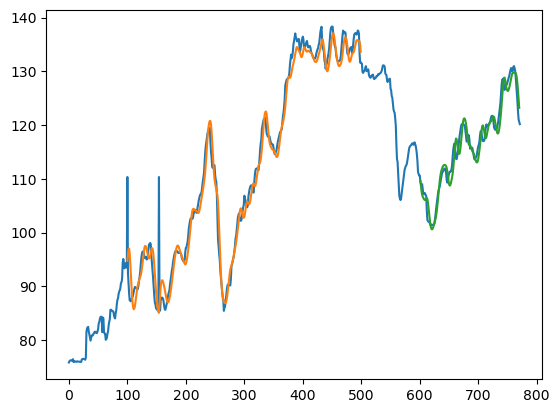

In [47]:
plt.plot(scaler.inverse_transform(petrolprice_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()